# Classification of dog breeds

In [100]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [101]:
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [102]:
sz=224
PATH ='Kaggle/dog-breed-identification/'

In [103]:
torch.cuda.is_available()

True

In [104]:
torch.backends.cudnn.enabled

True

In [105]:
arch=resnet34
csv_path=f'{PATH}/labels.csv'
n = len(list(open(csv_path)))
n=n-1
val_idxs = get_cv_idxs(n)

In [106]:
train_path = 'train/'
test_path = 'test/'

In [107]:
data = ImageClassifierData.from_csv(PATH, train_path, csv_path, 64, tfms_from_model(arch, sz), val_idxs, '.jpg', test_path)

In [108]:
conv = ConvLearner.pretrained(arch, data, precompute=True)

## Everything below has been commented because it was used for purposes of understanding the code

In [109]:
#conv.fit(0.01, 5)

In [110]:
#val_pred = conv.predict()
#val_pred

In [111]:
#final_preds = np.exp(val_pred)
#final_preds

In [112]:
learn_rate = conv.lr_find()

 94%|█████████▍| 120/128 [00:01<00:00, 110.04it/s, loss=26.5]


In [113]:
#conv.sched.plot_lr() # plots learning rate!

In [114]:
#conv.sched.plot_loss()

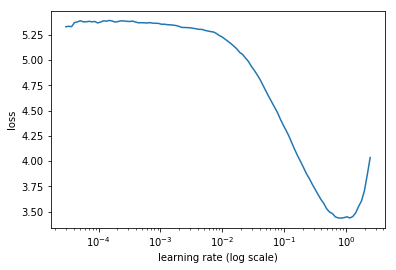

In [115]:
conv.sched.plot()

In [116]:
conv.fit(0.1, 15)

epoch      trn_loss   val_loss   accuracy                    
    0      1.244755   0.739716   0.776908  
    1      0.764164   0.611164   0.819472                    
    2      0.606776   0.606132   0.818982                     
    3      0.511456   0.59485    0.821429                     
    4      0.426257   0.615357   0.828767                    
    5      0.368485   0.650016   0.818982                     
    6      0.330403   0.653705   0.825832                    
    7      0.310095   0.657238   0.822407                     
    8      0.285746   0.65881    0.821429                    
    9      0.263242   0.677153   0.826321                    
    10     0.242972   0.678513   0.821429                     
    11     0.236762   0.716207   0.829256                     
    12     0.22091    0.773343   0.819961                     
    13     0.19845    0.744998   0.823875                    
    14     0.188454   0.768968   0.828767                     



[0.7689677385318069, 0.8287671238708869]

In [117]:
#saving the last layer, which is the only unfrozen layer up until this point
conv.save('breed_last')
conv.load('breed_last')

In [118]:
conv.unfreeze()

In [ ]:
conv.fit([0.1, 0.01, 0.001], 15)

epoch      trn_loss   val_loss   accuracy                    
    0      0.266081   0.750893   0.831213  
    1      0.289157   0.732195   0.828278                    
    2      0.268653   0.730488   0.832192                    
    3      0.257396   0.718758   0.829746                    
    4      0.246243   0.709416   0.832192                    
    5      0.24355    0.702735   0.83317                     
    6      0.259008   0.703561   0.834638                    
    7      0.240842   0.695825   0.831703                    
    8      0.244703   0.698218   0.834638                    
    9      0.23424    0.689508   0.836106                    
    10     0.224218   0.687339   0.836106                    
    11     0.222915   0.696236   0.834638                    
    12     0.223626   0.686351   0.834638                    
    13     0.234492   0.68843    0.835127                    
 82%|████████▏ | 105/128 [00:20<00:04,  5.10it/s, loss=0.234]